In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from keras.models import load_model
from keras.datasets import mnist

In [73]:
import pickle

In [74]:
decoder = load_model('decoder.h5')

In [75]:
with open('pca_code.dat','rb') as pf:
    pca_code = pickle.load(pf)

In [76]:
with open('pca.model.dat','rb') as pf:
    pca = pickle.load(pf)

In [77]:
((X_train,y_train),_) = mnist.load_data()

In [78]:
import math
import random

In [79]:
inputs = []
mu = 0.1
for i in y_train:
    z = np.zeros(10)
    z += mu*np.random.rand(10)
    z[i] = 1
    inputs.append(z)
inputs = np.array(inputs)

In [80]:
from keras.models import Model,Sequential
from keras.layers import LeakyReLU as LR, Dense, Activation, Dropout

In [81]:
gem = Sequential([
Dense(10),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(32)
])

In [82]:
gem.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

In [83]:
gem.fit(inputs,pca_code,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 4.3754
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.2060
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 4.1898
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 4.1829
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 4.1801
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 4.1759
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1732
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1709
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1727
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1708
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1702
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1674
E

In [84]:
auto_codes = gem.predict([inputs])

1875/1875 [==============================] - 3s 1ms/step


In [85]:
auto_lcodes = pca.inverse_transform(auto_codes)

In [86]:
predictions = decoder.predict(auto_lcodes)

1875/1875 [==============================] - 5s 3ms/step


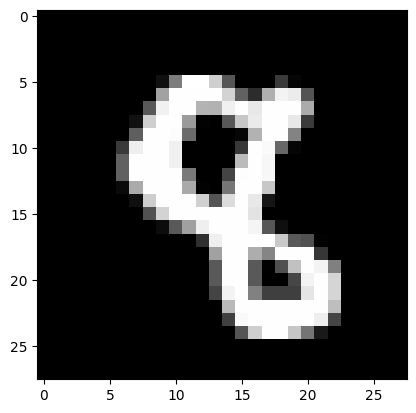

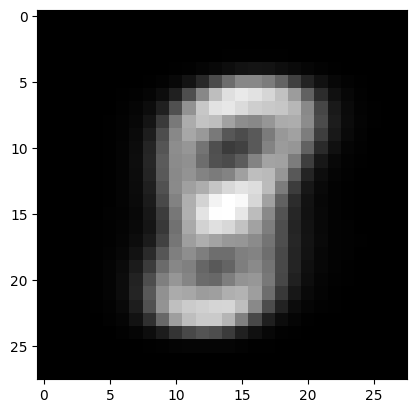

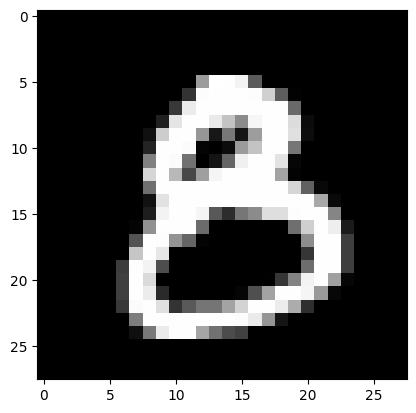

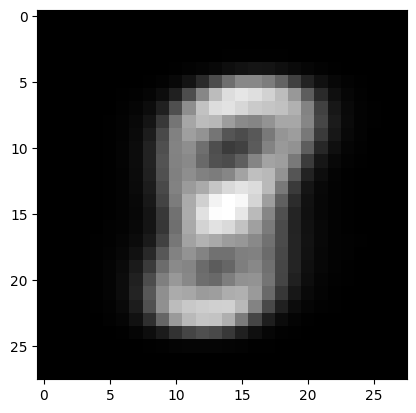

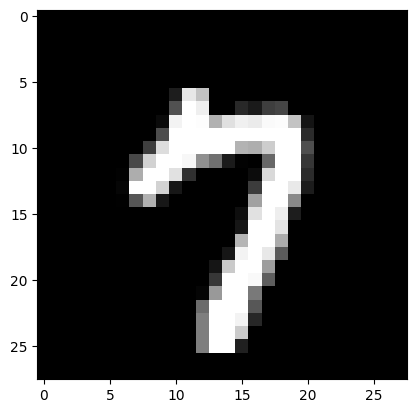

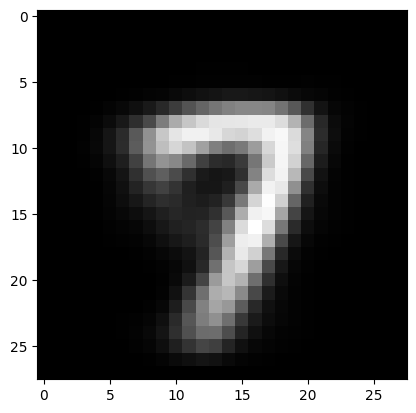

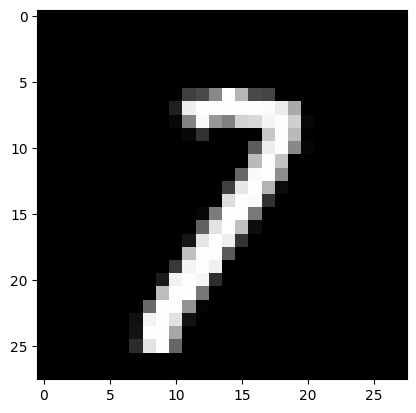

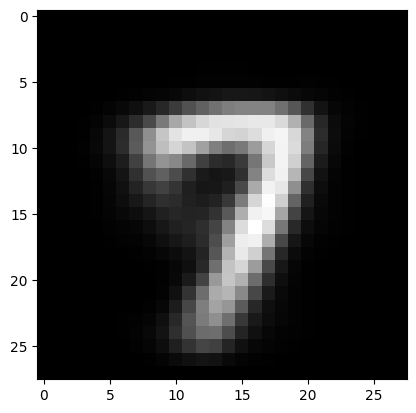

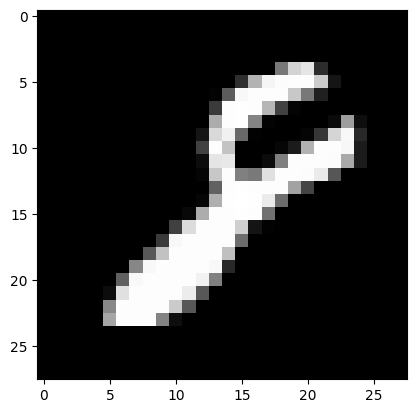

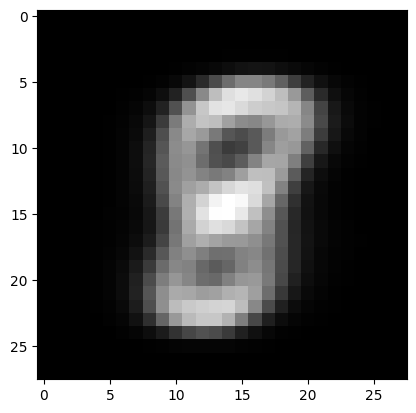

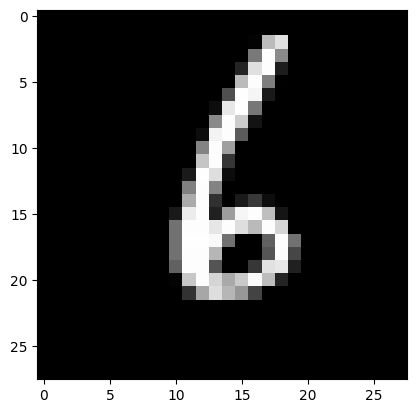

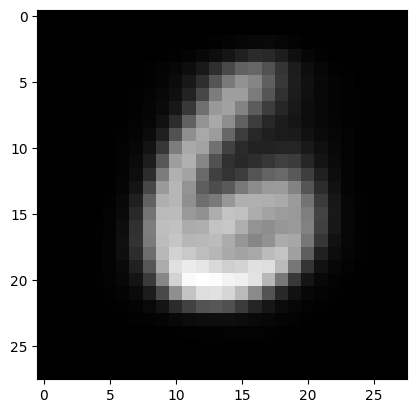

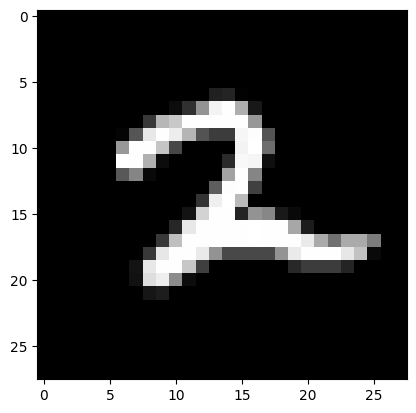

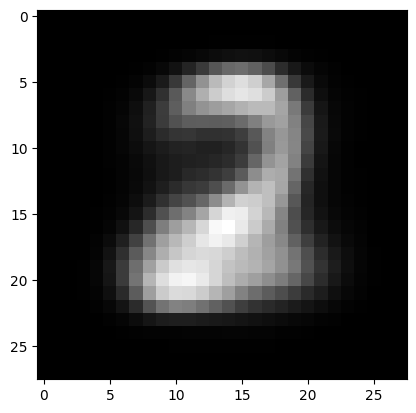

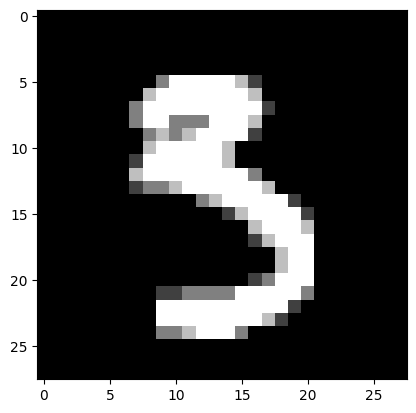

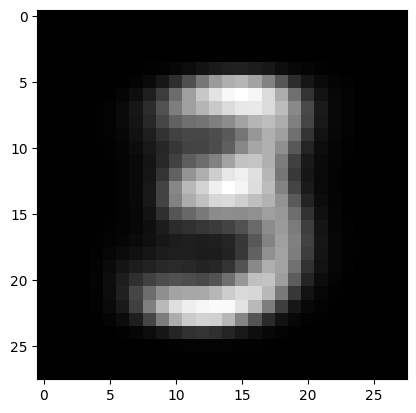

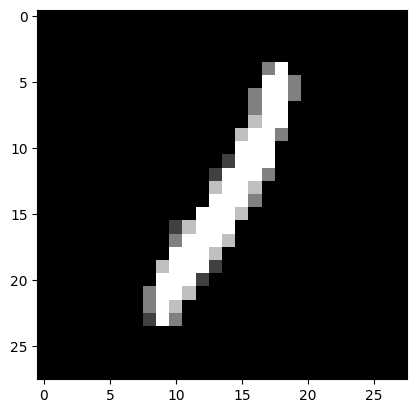

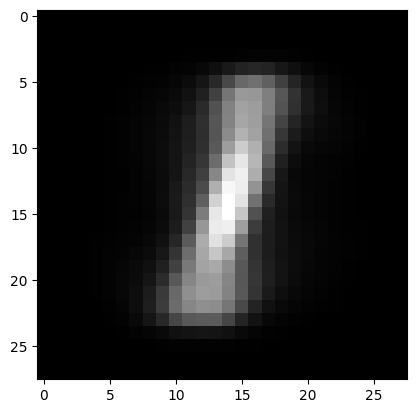

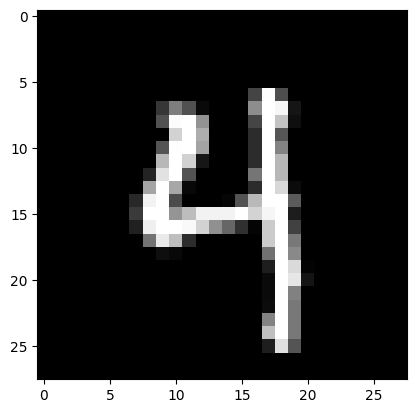

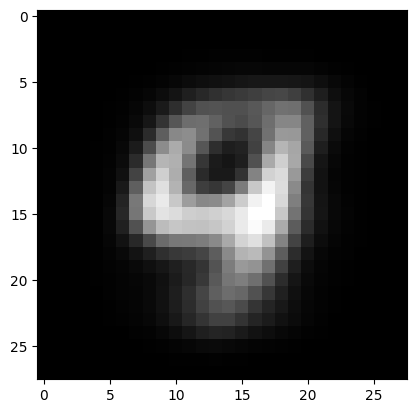

In [87]:
for i in range(10):
    n = math.floor(random.random()*len(predictions))
    plt.imshow(X_train[n],cmap='gray')
    plt.show()
    plt.imshow(predictions[n],cmap='gray')
    plt.show()